# 인공 신경망과 근사 함수

## 함수 근사해 보기

### 환경 세팅하기

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
NUM_SAMPLES = 1000
np.random.seed(int(time.time()))

### 2차 함수 근사해 보기

In [ ]:
xs= np.random.uniform(-2, 0.5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = 2*xs**2 + 3*xs + 5

### 5차 함수 근사해 보기

In [7]:
xs= np.random.uniform(-2, 2, NUM_SAMPLES)
np.random.shuffle(xs)
ys = (xs+1.7)*(xs+0.7)*(xs-0.3)*(xs-1.3)*(xs-1.9)+0.2

[-0.20846489  1.2524034  -0.35804191  1.01091023  0.69002956]
[-0.98563381  0.36921805 -0.93055812  1.04749171  1.15633133]


### 분수 함수 근사해 보기

In [4]:
xs= np.random.uniform(0.1, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = 1.0/xs

### Sin 함수 근사해 보기

In [3]:
xs= np.random.uniform(0, 2*np.pi, NUM_SAMPLES)
np.random.shuffle(xs)
ys = np.sin(xs)

### tanh 함수 근사해 보기

In [3]:
xs= np.random.uniform(-5, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = np.tanh(xs)

### e 지수 함수 근사해 보기

In [3]:
xs= np.random.uniform(-5, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = np.exp(xs)

### sigmoid 함수 근사해 보기

In [3]:
xs= np.random.uniform(-5, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = 1.0/(1.0+np.exp(-xs))

### 로그함수 근사해 보기

In [17]:
xs= np.random.uniform(0, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = np.log(xs)

### 제곱근 함수 근사해 보기

In [23]:
xs= np.random.uniform(0, 5, NUM_SAMPLES)
np.random.shuffle(xs)
ys = np.sqrt(xs)

### relu 함수 근사해 보기

In [30]:
xs= np.random.uniform(-3, 3, NUM_SAMPLES)
np.random.shuffle(xs)
ys = (xs>0)*xs

### leaky relu 함수 근사해 보기

In [36]:
xs= np.random.uniform(-3, 3, NUM_SAMPLES)
np.random.shuffle(xs)
ys = (xs>0)*xs + (xs<0)*0.1*xs

### 출력

[ 2.15517595  1.64153944 -1.874355    0.98677607 -0.08043749]
[ 2.15517595  1.64153944 -0.1874355   0.98677607 -0.00804375]


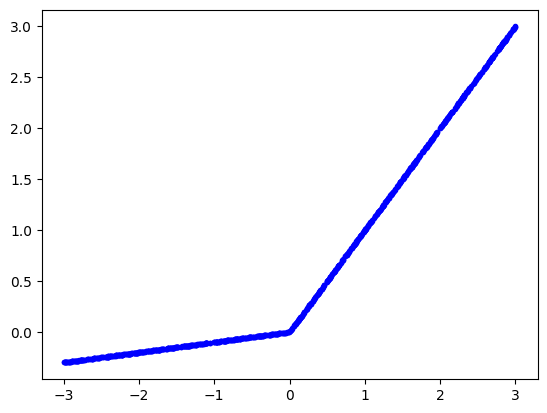

In [37]:
print(xs[:5])
print(ys[:5])
plt.plot(xs, ys, 'b.')
plt.show()

## 실제 데이터 생성하기

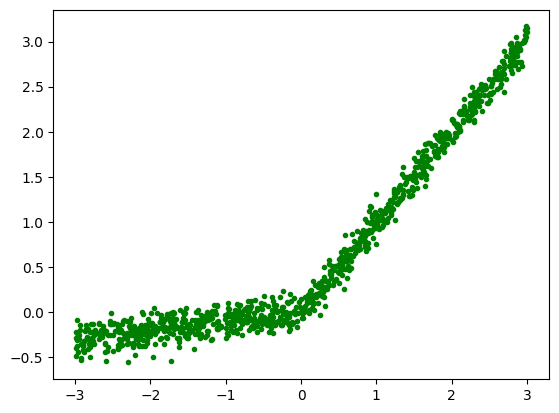

In [38]:
ys += 0.1*np.random.randn(NUM_SAMPLES)

plt.plot(xs, ys, 'g.')
plt.show()

## 훈련, 실험 데이터 분리하기

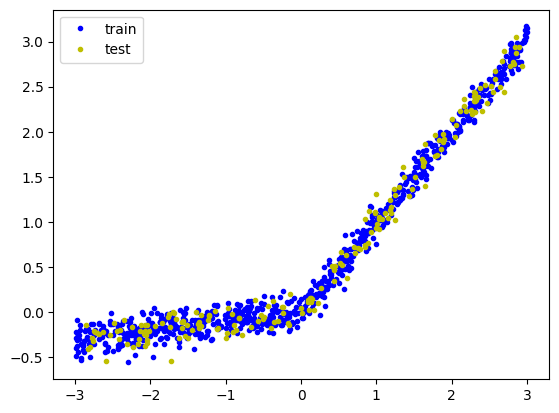

In [39]:
NUM_SPLIT =int(0.8*NUM_SAMPLES)

x_train, x_test = np.split(xs, [NUM_SPLIT])
y_train, y_test = np.split(ys, [NUM_SPLIT])

plt.plot(x_train, y_train, 'b.', label = 'train')
plt.plot(x_test, y_test, 'y.', label = 'test')
plt.legend()
plt.show()

## 인공 신경망 구성하기

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\kahn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


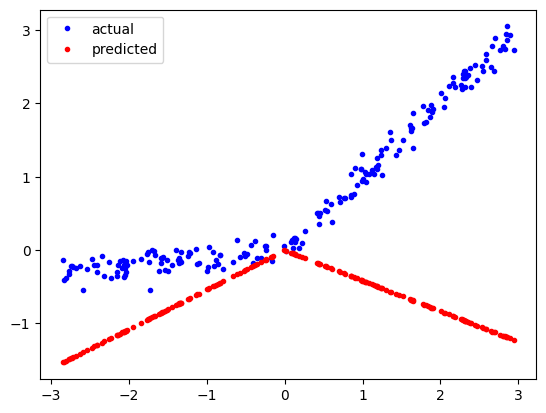

In [40]:
import tensorflow as tf

model_f = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
])

model_f.compile(optimizer='rmsprop', loss='mse')

p_test = model_f.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='actual')
plt.plot(x_test, p_test, 'r.', label='predicted')
plt.legend()
plt.show()

## 인공 신경망 학습시키기

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 2.5944
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 1.8110
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 1.4773
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1560 
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 1.1067
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.9302
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.7193
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.6179
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4418
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.2484
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.1357
Epoch 12/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0572
Epoch 13/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0290
Epoch 14/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.0190
Epoch 15/1000
25/25 ━━━━━━━━━━

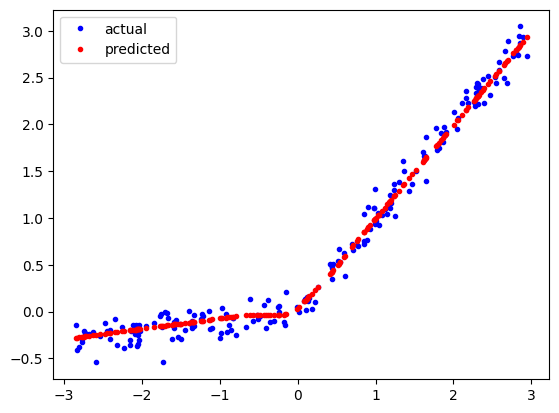

In [41]:
model_f.fit(x_train, y_train, epochs=1000)

p_test = model_f.predict(x_test)

plt.plot(x_test, y_test, 'b.', label='actual')
plt.plot(x_test, p_test, 'r.', label='predicted')
plt.legend()
plt.show()